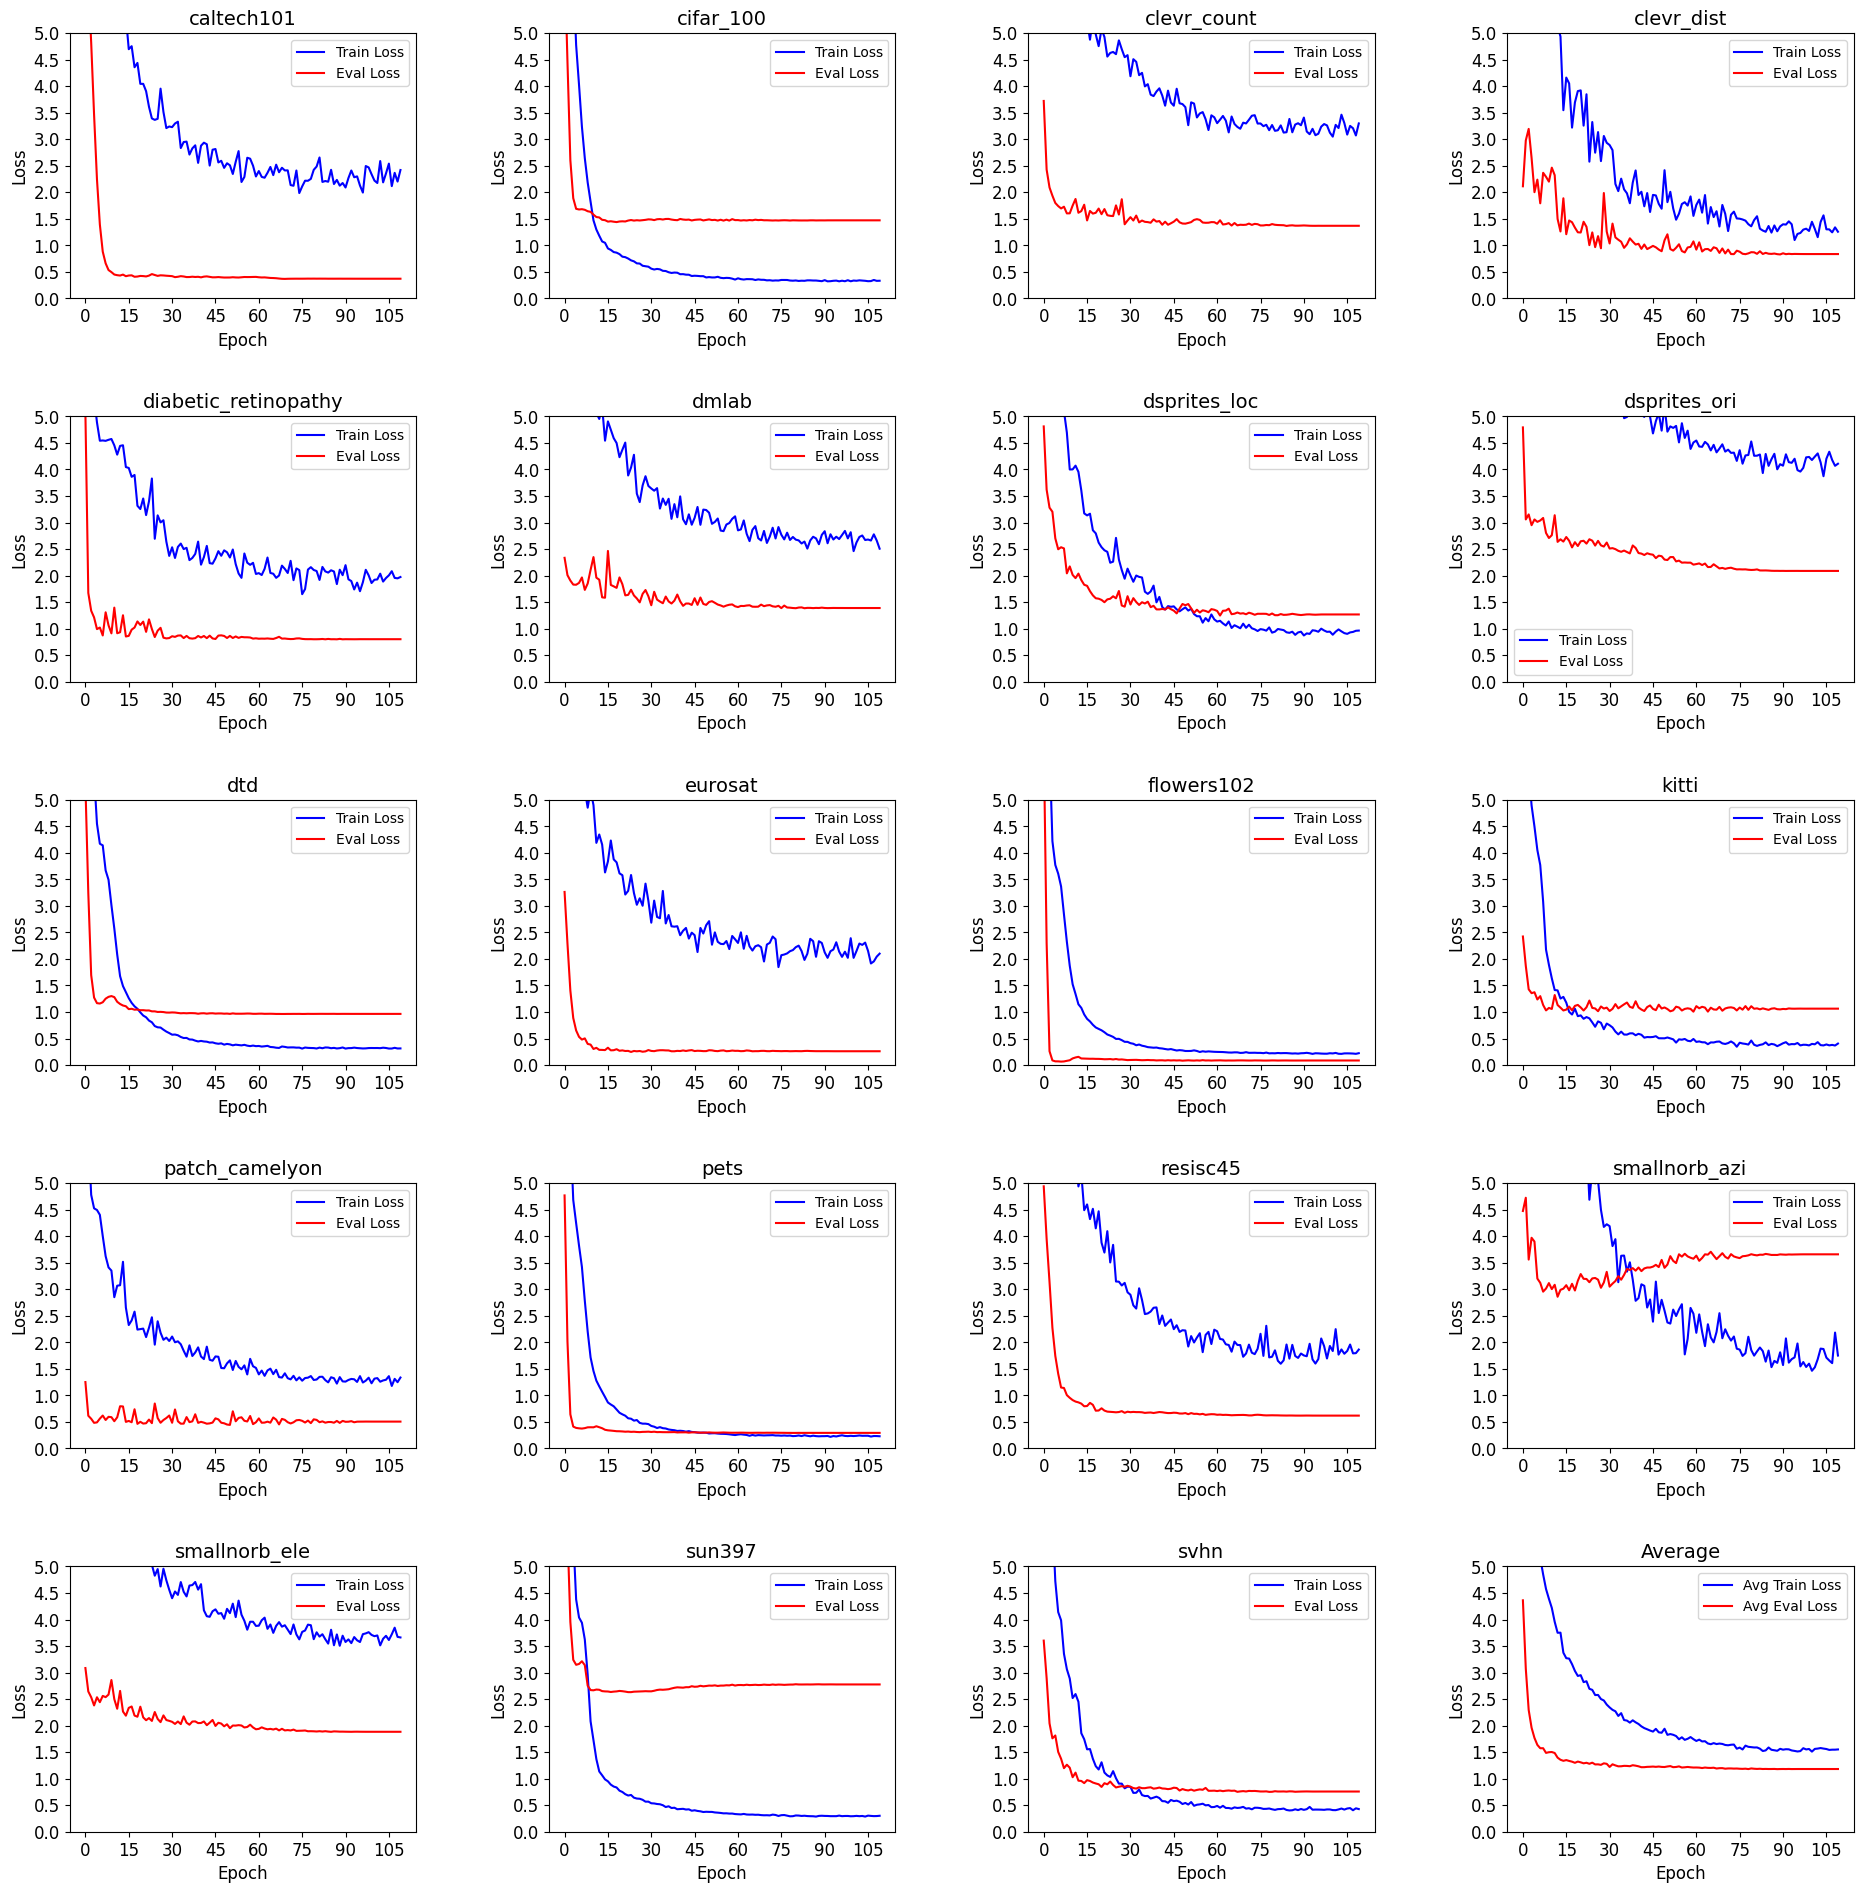

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

# 指定路径
# path = '/media/ruanjiacheng/新加卷/ecodes/Prompt/CV/GIST_ALL/outputs/[prompt]_0_0/vit_base_patch16_224_in21k/vtab'
path = '/media/ruanjiacheng/新加卷/ecodes/Prompt/CV/GIST_ALL/outputs/[prompt,gistp]_0.5_0/vit_base_patch16_224_in21k/vtab'

# 获取路径下所有的CSV文件
csv_files = [os.path.join(dp, f) for dp, dn, filenames in os.walk(path) for f in filenames if f.endswith('.csv')]

# 准备数据收集列表
train_losses = []
eval_losses = []
epochs = []

# 遍历所有CSV文件收集数据
for file_path in csv_files:
    df = pd.read_csv(file_path)
    train_losses.append(df['train_loss'].tolist())
    eval_losses.append(df['eval_loss'].tolist())
    epochs.append(df['epoch'].tolist())  # 假设所有文件的epoch数相同

# 计算平均损失
avg_train_loss = np.mean(np.array(train_losses), axis=0)
avg_eval_loss = np.mean(np.array(eval_losses), axis=0)

# 设置字体大小
plt.rcParams.update({'font.size': 12})

# 确定子图的布局
n_rows = 5
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
fig.tight_layout(pad=5.0)

# 绘制前19个图
for i, file_path in enumerate(csv_files):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    df = pd.read_csv(file_path)
    ax.plot(df['epoch'], df['train_loss'], label='Train Loss', color='blue')
    ax.plot(df['epoch'], df['eval_loss'], label='Eval Loss', color='red')
    title = file_path.split(os.sep)[-4]  # 简化标题，使用目录名
    ax.set_title(title, fontsize=14)
    ax.legend(fontsize=10)
    ax.set_xlabel('Epoch', fontsize=12)
    ax.set_ylabel('Loss', fontsize=12)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    
    # 设置y轴范围为0到5，最小刻度为0.5
    ax.set_ylim(0, 5)
    ax.set_yticks(np.arange(0, 5.5, 0.5))

# 绘制平均损失图
ax = axes[n_rows-1, n_cols-1]  # 将平均损失图放在最后一个位置
ax.plot(epochs[0], avg_train_loss, label='Avg Train Loss', color='blue')
ax.plot(epochs[0], avg_eval_loss, label='Avg Eval Loss', color='red')
ax.set_title('Average', fontsize=14)
ax.legend(fontsize=10)
ax.set_xlabel('Epoch', fontsize=12)
ax.set_ylabel('Loss', fontsize=12)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# 设置y轴范围为0到5，最小刻度为0.5
ax.set_ylim(0, 5)
ax.set_yticks(np.arange(0, 5.5, 0.5))

# 隐藏剩余的空子图
total_plots = n_rows * n_cols
for i in range(len(csv_files) + 1, total_plots):  # +1 为了包含平均损失图
    fig.delaxes(axes.flatten()[i])

plt.show()

